In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# import libraries for ML
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

from sklearn.utils import shuffle
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split 

from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import chi2,SelectKBest
from statsmodels.stats.outliers_influence import variance_inflation_factor


from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import roc_auc_score,f1_score
from sklearn.metrics import accuracy_score,roc_curve,precision_score

from sklearn.metrics import recall_score,precision_recall_curve,roc_auc_score
from sklearn import metrics

#from xgboost import XGBclassifier

from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold,StratifiedKFold

import itertools


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
dfx=pd.read_csv('/content/gdrive/My Drive/Fraud.csv')
dfy=pd.read_csv('/content/gdrive/My Drive/FraudY.csv')
dfx.tail()

,Unnamed: 0,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
6362615,6362615,2,339682.13,339682.13,0.0,0.00,339682.13
6362616,6362616,5,6311409.28,6311409.28,0.0,0.00,0.00
6362617,6362617,2,6311409.28,6311409.28,0.0,68488.84,6379898.11
6362618,6362618,5,850002.52,850002.52,0.0,0.00,0.00
6362619,6362619,2,850002.52,850002.52,0.0,6510099.11,7360101.63


In [ ]:
dfy.tail()

,Unnamed: 0,isFraud
6362615,6362615,1
6362616,6362616,1
6362617,6362617,1
6362618,6362618,1
6362619,6362619,1


In [ ]:
dfx=dfx.drop(['Unnamed: 0'], axis =1)
dfx.tail()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
6362615,2,339682.13,339682.13,0.0,0.00,339682.13
6362616,5,6311409.28,6311409.28,0.0,0.00,0.00
6362617,2,6311409.28,6311409.28,0.0,68488.84,6379898.11
6362618,5,850002.52,850002.52,0.0,0.00,0.00
6362619,2,850002.52,850002.52,0.0,6510099.11,7360101.63


In [ ]:
dfy=dfy.drop(['Unnamed: 0'], axis =1)
dfy.tail()

,isFraud
6362615,1
6362616,1
6362617,1
6362618,1
6362619,1


In [ ]:
Y=dfy.tail(100000).to_numpy()
X=dfx.tail(100000).to_numpy()

In [ ]:
sum(Y)/len(Y)

array([0.01472])

In [ ]:
X.shape

(100000, 6)

In [ ]:
#changing type column

In [ ]:
d={
  'CASH_IN':1,
  'CASH_OUT':2,
  'DEBIT':3,
  'PAYMENT':4,
  'TRANSFER':5
}
d

{'CASH_IN': 1, 'CASH_OUT': 2, 'DEBIT': 3, 'PAYMENT': 4, 'TRANSFER': 5}

In [ ]:
a=0
b=0
for num in range(len(dfx['type'])):
  if dfx['type'][num] in d.keys():
    dfx['type'][num]=d[dfx['type'][num]]
    b=b+1
  a=a+1
  if b%100000==0 and b>0:
    print(a)
    #dfx.to_csv('/content/gdrive/My Drive/Fraud.csv')
a,b

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


6352165


(6362620, 110455)

In [ ]:
# categorical value need to be transformed
tmp = dfx.drop(columns=['type']  )
new_dfx = pd.concat([pd.get_dummies(dfx['type'],prefix='Type'), tmp], axis=1)
new_dfx

,Type_1,Type_2,Type_3,Type_4,Type_5,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,0,0,0,1,0,9839.64,170136.00,160296.36,0.00,0.00
1,0,0,0,1,0,1864.28,21249.00,19384.72,0.00,0.00
2,0,0,0,0,1,181.00,181.00,0.00,0.00,0.00
3,0,1,0,0,0,181.00,181.00,0.00,21182.00,0.00
4,0,0,0,1,0,11668.14,41554.00,29885.86,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...
6362615,0,1,0,0,0,339682.13,339682.13,0.00,0.00,339682.13
6362616,0,0,0,0,1,6311409.28,6311409.28,0.00,0.00,0.00
6362617,0,1,0,0,0,6311409.28,6311409.28,0.00,68488.84,6379898.11
6362618,0,0,0,0,1,850002.52,850002.52,0.00,0.00,0.00


In [ ]:
df=new_dfx.assign(isFraud = dfy.to_numpy())
dfy1=df.query('isFraud == 1')
dfy0=df.query('isFraud == 0').sample(n=len(dfy1))
balanced_df= pd.concat([dfy0, dfy1])
balanced_df.tail()

,Type_1,Type_2,Type_3,Type_4,Type_5,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
6362615,0,1,0,0,0,339682.13,339682.13,0.0,0.00,339682.13,1
6362616,0,0,0,0,1,6311409.28,6311409.28,0.0,0.00,0.00,1
6362617,0,1,0,0,0,6311409.28,6311409.28,0.0,68488.84,6379898.11,1
6362618,0,0,0,0,1,850002.52,850002.52,0.0,0.00,0.00,1
6362619,0,1,0,0,0,850002.52,850002.52,0.0,6510099.11,7360101.63,1


In [ ]:
y=dfy.tail(100000).to_numpy()
X=new_dfx.tail(100000).to_numpy()

In [ ]:
y=balanced_df['isFraud'].to_numpy()
Y=y
X=balanced_df.drop(['isFraud'], axis=1).to_numpy()
X.shape, y.shape

((16426, 10), (16426,))

In [ ]:
#PCA

In [ ]:
normalized_X = (X-np.mean(X, axis=0))/X.std(axis=0)
normalized_y = Y - np.mean(Y)

In [ ]:
v, s, uT = np.linalg.svd(normalized_X, full_matrices=False)
u = uT.T
print('left singular vectors', v.shape)
print("singular values", s.shape)
print("right singular vectors", u.shape)

left singular vectors (16426, 10)
singular values (10,)
right singular vectors (10, 10)


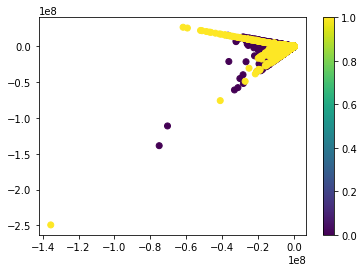

In [ ]:
# project the data onto the two principal components
u1 = u[:, 0]
u2 = u[:, 1]
plt.scatter(X @ u1,  X @ u2, c=Y)
plt.colorbar()

In [ ]:
u1

array([-0.27594004,  0.03303204,  0.01642419,  0.22954011, -0.03569681,
       -0.37811953, -0.57130991, -0.48434842, -0.25643007, -0.31434715])

In [ ]:
u2

array([ 0.15904145, -0.45268743, -0.00634558,  0.13571149,  0.27224326,
        0.02504121,  0.22147076,  0.26520767, -0.51397057, -0.54132101])

In [ ]:
# split train and test set            
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# function that used to train the model and get the result without hyperparameter optmization

def train_model(model_type,x_train,y_train):



  """
  Return the model and print out accuracy score(without hyperparameter optmization)
  """
    
  print("model type is ", model_type)
    
    # set clf and params
  if model_type == "LogisticRegression":
    clf = LogisticRegression(max_iter =10000)

     
  if model_type == "RandomForest":
    clf = RandomForestClassifier()
 
     
  if model_type == "NaiveBayes":
    clf = GaussianNB()
 
  if model_type == "KNN":
    clf = KNeighborsClassifier()
     
  print('Fitting model...')
  model = clf.fit(x_train,y_train)
  return model 



def get_optimized_model(model_type,x_train,x_test,y_train,y_test):


  """
  Return optimized model after finding the best hyperparameter using gridsearchCV

  """

  LR_params = {'penalty' : ['l1', 'l2'],'C' : np.logspace(-4, 4, 10), 'solver' : ['lbfgs','newton-cg','saga'],
    'max_iter' : [1000]
    }
 
  RF_params = {
        'n_estimators':list(range(10,101,10)),
        'max_features':list(range(3,5,1)) + [None,'auto']
    }

  KNN_params = {'leaf_size':np.arange(1,50,3) ,  'n_neighbors':np.arange(1,100,2)}

  NB_params = {
        'var_smoothing':np.logspace(0,-9,num=100)
    }
 

  # set clf and params
  if model_type == "LogisticRegression":
    clf = LogisticRegression(max_iter =10000)
    params = LR_params
      
  if model_type == "RandomForest":
    clf = RandomForestClassifier()
    params = RF_params

  if model_type == "KNN":
    clf = KNeighborsClassifier()
    params = KNN_params

  if model_type == "NB":
    clf = GaussianNB()
    params = NB_params
    
  print(f'Selected model for optimization is {model_type}')

  # cross validation using grid search
  grid  = GridSearchCV(clf,param_grid=params,cv=3,scoring='f1')
  grid.fit(x_train,y_train)
  test_predicted_labels = grid.predict(x_test)
  optimized_model = grid.best_estimator_
  print('Best',optimized_model.get_params())
  ac_score = accuracy_score(y_test, test_predicted_labels)
  print(f'Optimized Accuracy : {ac_score}')
  return optimized_model


# function that will be used to plot the confusion matrix 
def plot_confusion_matrix(cm,classes,normalize=False,title='cm',cmap=plt.cm.Blues):
    plt.figure(figsize=(10,10))
    plt.imshow(cm,interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation=45)
    plt.yticks(tick_marks,classes)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:,np.newaxis]
    
    thresh = cm.max()/2.
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plot.text(j,i,round(cm[i,j],2),horizontalalignment='center',
                 color = 'white' if cm[i,j]> thresh else "black")
    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel("Predicted Label")

### Model Selection and HyperParameter Tuning

First, we can get the accuracy score for each model without hyperparameter optimization. 

Then we select two models which perform better than the other.

After selecting two models, then we can do the hyperparameter optimization for those two models.

In [ ]:
# try to compare model without hyperparameter tuning 
# compare the performances so that we choose end up one or two model for GridSearch

model_types = ["NaiveBayes","LogisticRegression",'KNN',"RandomForest"] 
for model in model_types:
  print()
  model_trained = train_model(model,X_train,y_train)
  ac_score = accuracy_score(y_test,model_trained.predict(X_test))
  print(f"Model type : {model}, accuracy: {ac_score}")
  print()
  print()


model type is  NaiveBayes
Fitting model...
Model type : NaiveBayes, accuracy: 0.6722458916615947



model type is  LogisticRegression
Fitting model...
Model type : LogisticRegression, accuracy: 0.8304930006086427



model type is  KNN
Fitting model...
Model type : KNN, accuracy: 0.9567863664029215



model type is  RandomForest
Fitting model...
Model type : RandomForest, accuracy: 0.9936092513694461




### Train the model with hyperparameter optimization

based on the result above, we will do the hyperparameter tuning for KNN and RF model

In [ ]:
# hyperparameter tuning for RF model
rf_model = get_optimized_model(model_type="RandomForest",x_train=X_train,x_test=X_test,y_train=y_train,y_test=y_test)

Selected model for optimization is RandomForest
Best {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 10, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
Optimized Accuracy : 0.9942178940961656


In [ ]:
# hyperparameter tuning for KNN model
knn_model = get_optimized_model(model_type="KNN",x_train=X_train,x_test=X_test,y_train=y_train,y_test=y_test)

Selected model for optimization is KNN
Best {'algorithm': 'auto', 'leaf_size': 1, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 1, 'p': 2, 'weights': 'uniform'}
Optimized Accuracy : 0.9592209373097992


Visualized acc from KNN model corresponding to the number of 'K'

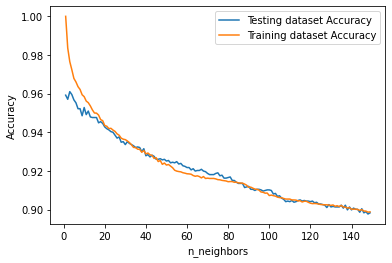

In [ ]:
neighbors = np.arange(1, 150)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
 
# Loop over K values
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
     
    # Compute training and test data accuracy
    
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)
 
# Generate plot
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')
 
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

## Model Evaluation

1. Confusion Matrix

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1649
           1       0.99      1.00      0.99      1637

    accuracy                           0.99      3286
   macro avg       0.99      0.99      0.99      3286
weighted avg       0.99      0.99      0.99      3286



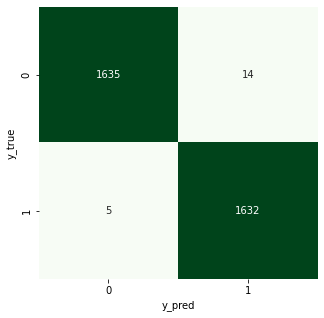

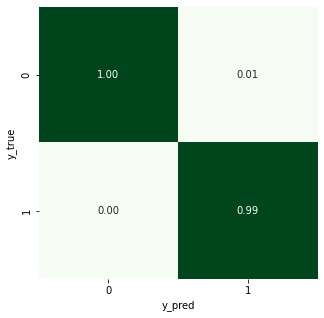

In [ ]:
# confusion matrix for random forest model 

y_pred = rf_model.predict(X_test)
print(classification_report(y_test,y_pred))

import seaborn as sns
cm = confusion_matrix(y_test,rf_model.predict(X_test))
f, ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,cbar=False,annot=True,cmap="Greens",fmt="d")
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()


cm = confusion_matrix(y_test,rf_model.predict(X_test))
cmn = cm.astype('float') / sum(cm)
f, ax=plt.subplots(figsize=(5,5))
sns.heatmap(cmn,cbar=False,annot=True,cmap="Greens",fmt=".2f")
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

              precision    recall  f1-score   support

           0       0.97      0.95      0.96      1649
           1       0.95      0.97      0.96      1637

    accuracy                           0.96      3286
   macro avg       0.96      0.96      0.96      3286
weighted avg       0.96      0.96      0.96      3286



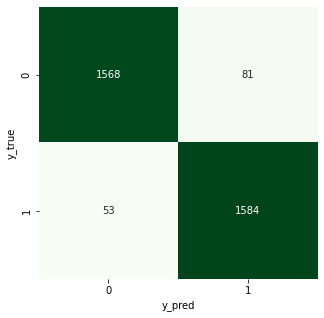

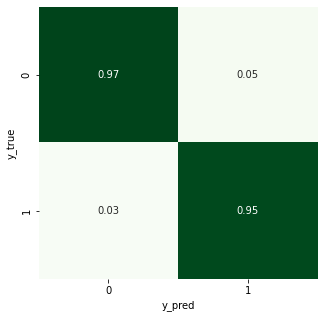

In [ ]:
# confusion matrix for KNN model
y_pred = knn_model.predict(X_test)
print(classification_report(y_test,y_pred))

cm = confusion_matrix(y_test,knn_model.predict(X_test))
f, ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,cbar=False,annot=True,cmap="Greens",fmt="d")
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()
 




import seaborn as sns
cm = confusion_matrix(y_test,knn_model.predict(X_test))
cmn = cm.astype('float') / sum(cm)
f, ax=plt.subplots(figsize=(5,5))
sns.heatmap(cmn,cbar=False,annot=True,cmap="Greens",fmt=".2f")
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

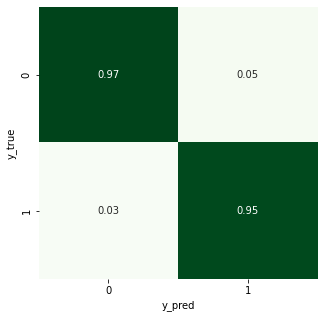

In [ ]:

import seaborn as sns
cm = confusion_matrix(y_test,knn_model.predict(X_test))
cmn = cm.astype('float') / sum(cm)
f, ax=plt.subplots(figsize=(5,5))
sns.heatmap(cmn,cbar=False,annot=True,cmap="Greens",fmt=".2f")
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

2. ROC curve

0.5
0.9592515113470965
0.9980336465742737


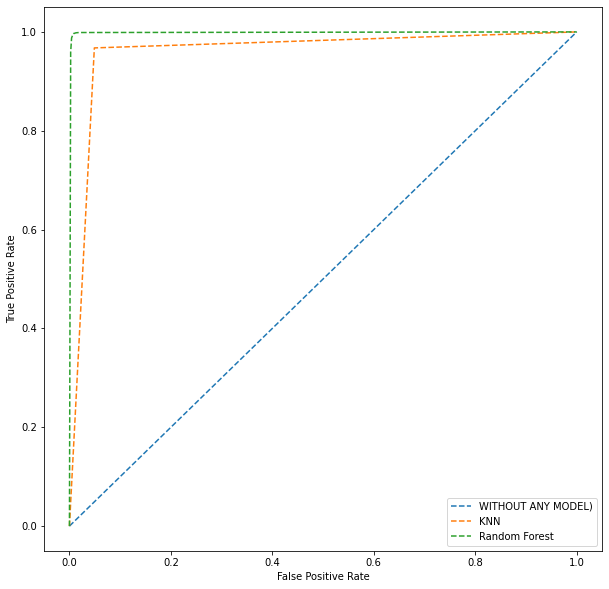

In [ ]:
# ROC curve

from sklearn.metrics import roc_curve,roc_auc_score
from matplotlib import pyplot as plot
plt.figure(figsize=(10,10))

random_probs = [0 for _ in range(len(y_test))]

knn_model_probs = knn_model.predict_proba(X_test)
knn_model_probs = knn_model_probs[:,1]

rf_model_probs = rf_model.predict_proba(X_test)
rf_model_probs = rf_model_probs[:,1]

random_auc = roc_auc_score(y_test,random_probs)
knn_model_auc = roc_auc_score(y_test,knn_model_probs)
rf_model_auc = roc_auc_score(y_test,rf_model_probs)


print(random_auc)
print(knn_model_auc)
print(rf_model_auc)

random_fpr,random_tpr,_  = roc_curve(y_test,random_probs)
knn_model_fpr,knn_model_tpr,_ =  roc_curve(y_test,knn_model_probs)
rf_model_fpr,rf_model_tpr,_ =  roc_curve(y_test,rf_model_probs)

plt.plot(random_fpr,random_tpr,linestyle='--',label='WITHOUT ANY MODEL)')
plt.plot(knn_model_fpr,knn_model_tpr,linestyle='--',label='KNN')
plt.plot(rf_model_fpr,rf_model_tpr,linestyle='--',label='Random Forest')


plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()
plt.show()

3. Feature Importance extracted from Random Forest model

In [ ]:
def plot_feature_importance(importance,names,model_type):


#Create arrays from feature importance and feature names
  feature_importance = np.array(importance)
  feature_names = np.array(names)

#Create a DataFrame using a Dictionary
  data={'feature_names':feature_names,'feature_importance':feature_importance}
  fi_df = pd.DataFrame(data)

#Sort the DataFrame in order decreasing feature importance
  fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

#Define size of bar plot
  plt.figure(figsize=(10,8))
#Plot Searborn bar chart
  sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'],palette="Blues_d",)
#Add chart labels
  plt.title(model_type + 'FEATURE IMPORTANCE')
  plt.xlabel('FEATURE IMPORTANCE')
  plt.ylabel('FEATURE NAMES')

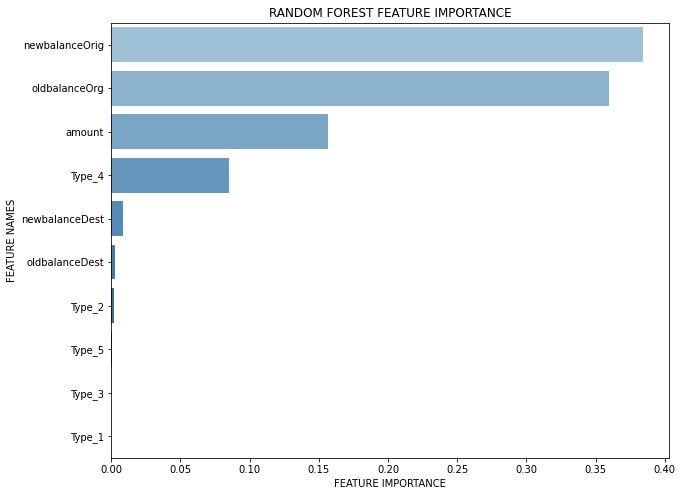

In [ ]:
clf = rf_model
tmp = balanced_df.drop('isFraud',axis=1)
plot_feature_importance(clf.feature_importances_,tmp.columns,"RANDOM FOREST ")